In [1]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_excel('../data/panelDatasetRaw.xlsx')
features = train_df.columns[2:-1].values
labels = train_df.columns[-1]
X_train, X_test, y_train, y_test = train_test_split(train_df[features], train_df[labels], test_size=0.2, random_state=0)
print('Build the dataset for lightgbm')
print('Train data shape: ', X_train.shape)
print('Test data shape: ', X_test.shape)
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

Build the dataset for lightgbm
Train data shape:  (369, 35)
Test data shape:  (93, 35)


In [3]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=len(X_train),random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9032258064516129


In [4]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))


Accuracy:  0.946236559139785


Start training...
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's binary_logloss: 0.676069	valid_0's auc: 0.881766
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's binary_logloss: 0.649929	valid_0's auc: 0.931149
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's binary_logloss: 0.631667	valid_0's auc: 0.918566
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's binary_logloss: 0.615342	valid_0's auc: 0.911443
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's binary_logloss: 0.594251	valid_0's auc: 0.925689
[Li

/home/step/anaconda3/envs/xclds/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


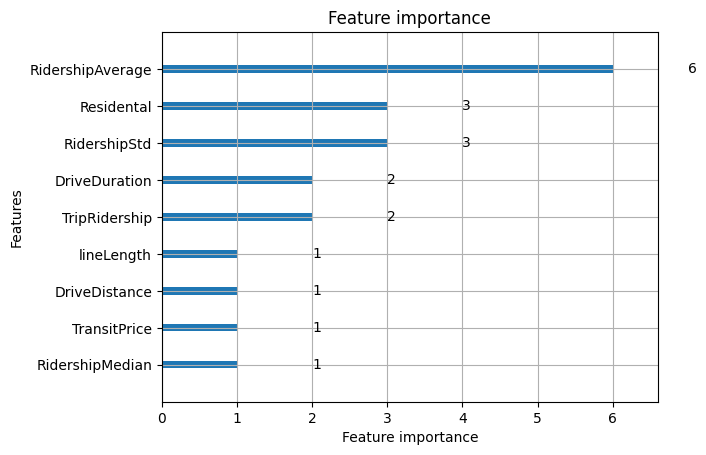

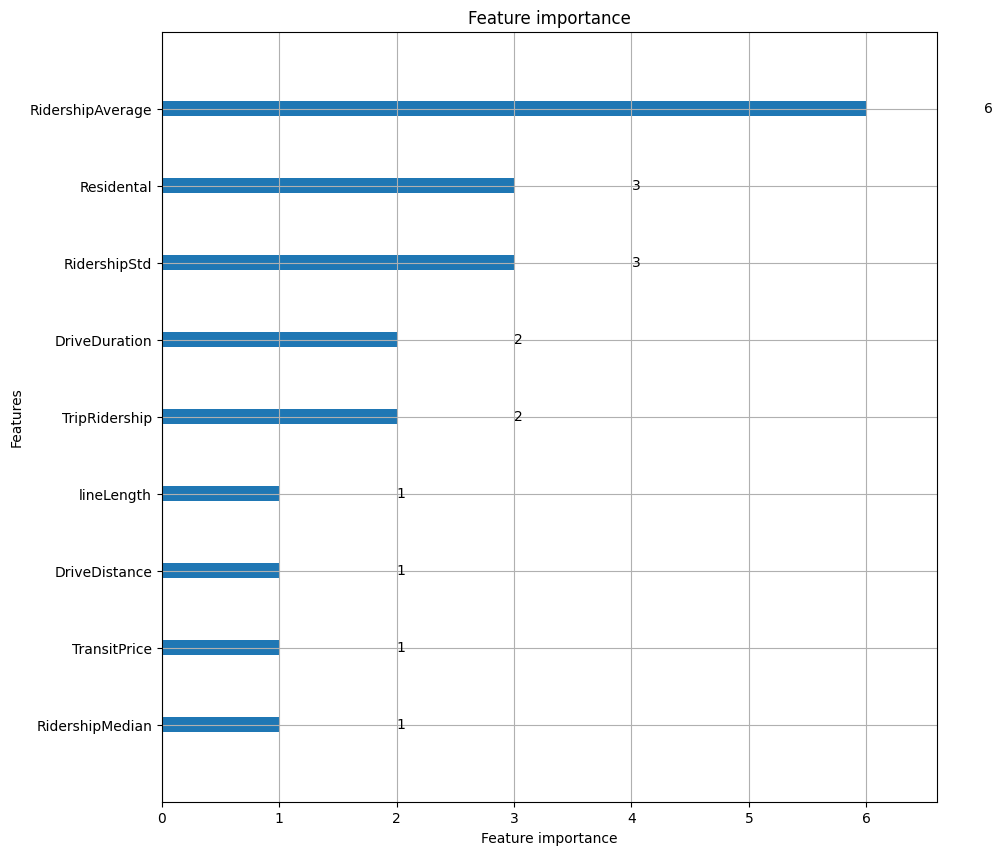

In [16]:
from sklearn.metrics import log_loss, roc_auc_score
# Set parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Start training...')
# train
gbm = lgb.train(params, train_data, num_boost_round=20, valid_sets=test_data, early_stopping_rounds=5)

print('Save model...')
# save model to file
gbm.save_model('model.txt')

print('Start predicting...')
# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The logloss of prediction is:', log_loss(y_test, y_pred))
print('The auc of prediction is:', roc_auc_score(y_test, y_pred))

print('Plot feature importances...')
# feature importances
ax = lgb.plot_importance(gbm)
ax = lgb.plot_importance(gbm,title='Feature importance', xlabel='Feature importance', ylabel='Features', figsize=(10, 10))
plt.show()
